In [1]:
import os

In [2]:
#importing the dependencies,that is the tools that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
path='C:\\Users\\Arup Dey\\Downloads\\'

In [4]:
#loading the csv data to a pandas data frame
car_dataset=pd.read_csv(path+"car_data.csv")

In [5]:
#viewing the first five rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [7]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#Encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
#Separting the data into X and Y

X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)

Y=car_dataset['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
fuel_type=car_dataset['Fuel_Type']

seller_type=car_dataset['Seller_Type']

transmission_type=car_dataset['Transmission']

selling_price=car_dataset['Selling_Price']

In [16]:
#visualising categorical data columns

from matplotlib import style

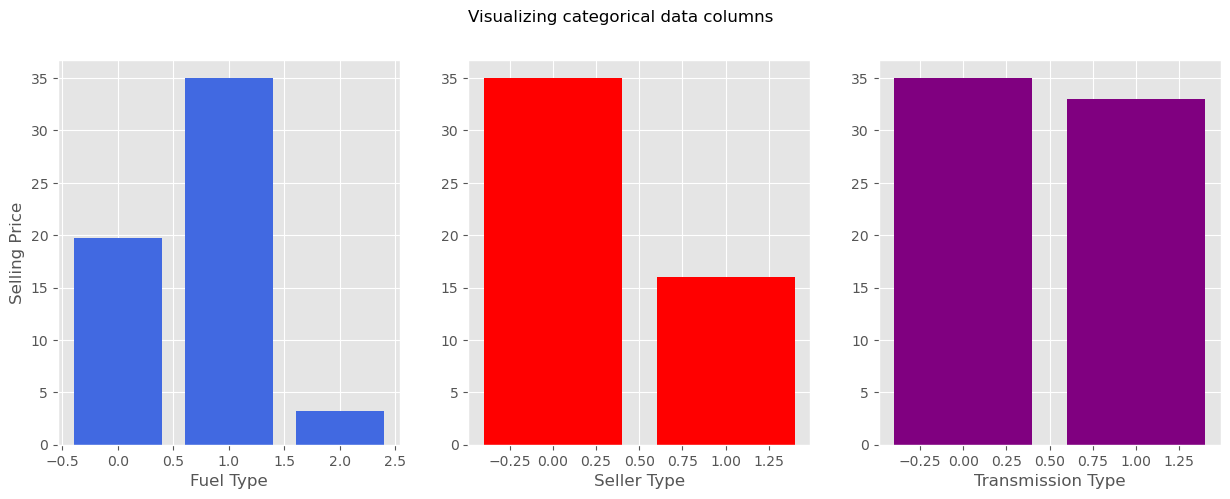

In [17]:
style.use('ggplot')

fig=plt.figure(figsize=(15,5))

fig.suptitle('Visualizing categorical data columns')

plt.subplot(1,3,1)

plt.bar(fuel_type,selling_price,color='royalblue')

plt.xlabel("Fuel Type")

plt.ylabel("Selling Price")

plt.subplot(1,3,2)

plt.bar(seller_type,selling_price,color='red')

plt.xlabel("Seller Type")

plt.subplot(1,3,3)

plt.bar(transmission_type,selling_price,color='purple')

plt.xlabel("Transmission Type")

plt.show()

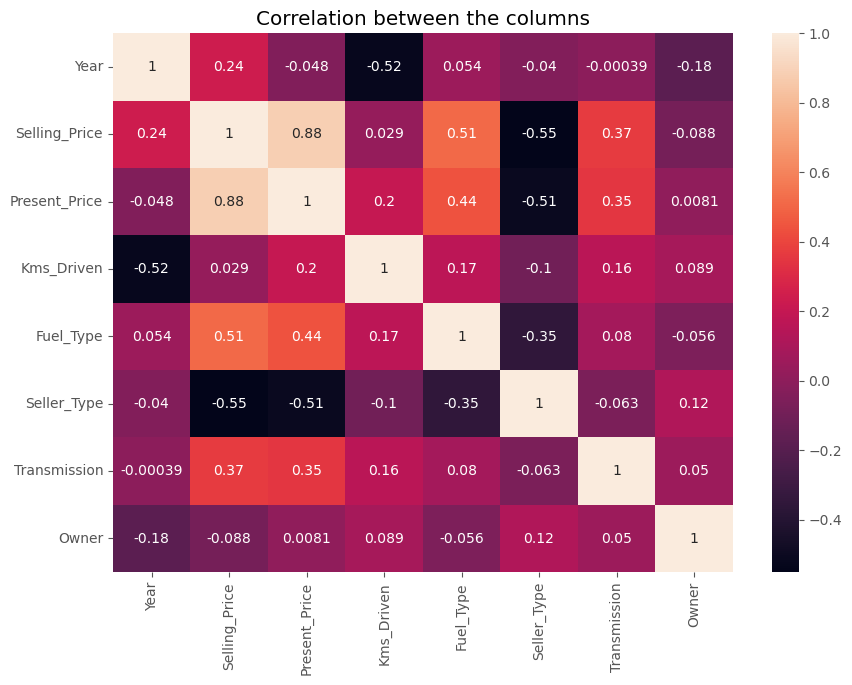

In [18]:
#showing correlation between the columns by generating heatmap

plt.figure(figsize=(10,7))

sns.heatmap(car_dataset.corr(),annot=True)

plt.title("Correlation between the columns")

plt.show()

In [19]:
#Splitting the data into training and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [20]:
#Loading the Linear Regression Model

linear_reg=LinearRegression()

linear_reg.fit(X_train,Y_train)

LinearRegression()

In [21]:
#prediction on Training data

X_train_pred=linear_reg.predict(X_train)

In [22]:
#R squared error

error_score=metrics.r2_score(Y_train,X_train_pred)

print("R squared error : ",error_score)

R squared error :  0.8799451660493698


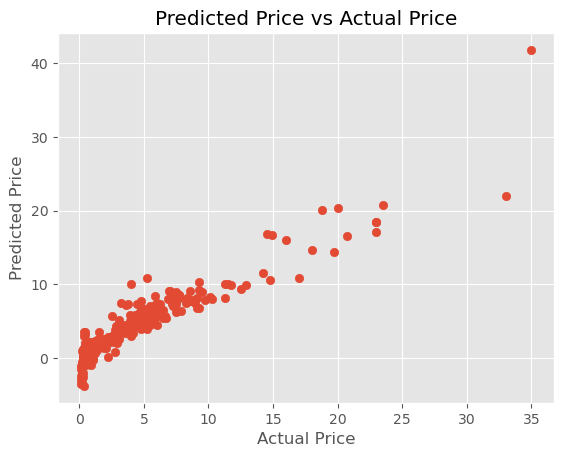

In [23]:
#Visualizing the actual prices and predicted prices of training data

plt.scatter(Y_train,X_train_pred)

plt.xlabel("Actual Price")

plt.ylabel("Predicted Price")

plt.title("Predicted Price vs Actual Price")

plt.show()

In [24]:
#prediction on Testing data

X_test_pred=linear_reg.predict(X_test)

In [25]:
#R squared error

error_score=metrics.r2_score(Y_test,X_test_pred)

print("R squared error : ",error_score)

R squared error :  0.8365766715026905


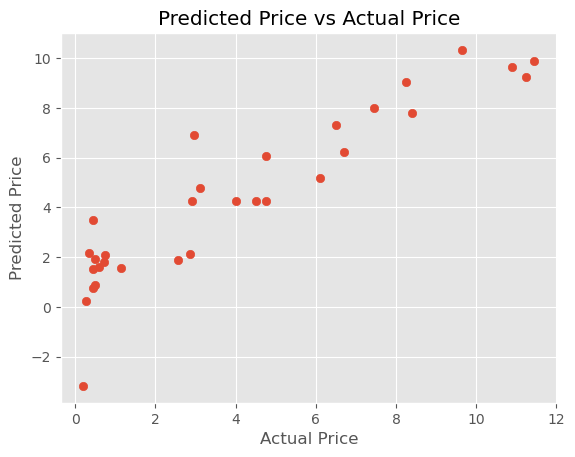

In [26]:
#Visualizing the actual prices and predicted prices of testing data

plt.scatter(Y_test,X_test_pred)

plt.xlabel("Actual Price")

plt.ylabel("Predicted Price")

plt.title("Predicted Price vs Actual Price")

plt.show()

In [27]:
#Loading the lasso regression model

lasso_reg=Lasso()

lasso_reg.fit(X_train,Y_train)

Lasso()

In [28]:
#prediction on Training data

X_train_pred=lasso_reg.predict(X_train)

In [29]:
#R squared error

error_score=metrics.r2_score(Y_train,X_train_pred)

print("R squared error : ",error_score)

R squared error :  0.8427856123435794


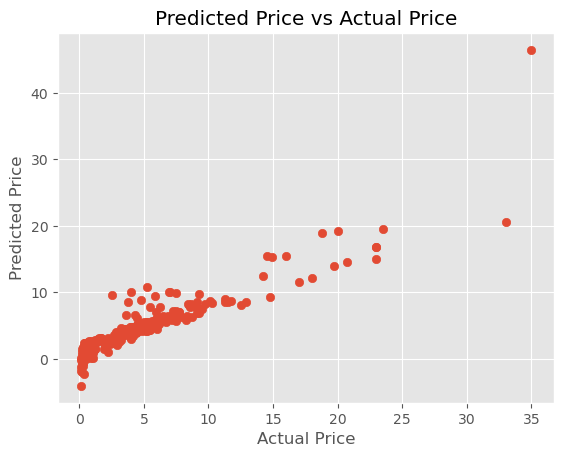

In [30]:
#Visualizing the actual prices and predicted prices of training data

plt.scatter(Y_train,X_train_pred)

plt.xlabel("Actual Price")

plt.ylabel("Predicted Price")

plt.title("Predicted Price vs Actual Price")

plt.show()

In [31]:
#prediction on Testing data

X_test_pred=lasso_reg.predict(X_test)

In [32]:
#R squared error

error_score=metrics.r2_score(Y_test,X_test_pred)

print("R squared error : ",error_score)

R squared error :  0.8709167941173195


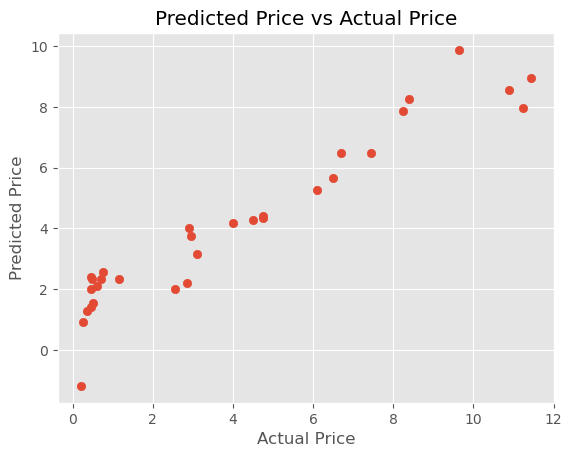

In [33]:
#Visualizing the actual prices and predicted prices of testing data

plt.scatter(Y_test,X_test_pred)

plt.xlabel("Actual Price")

plt.ylabel("Predicted Price")

plt.title("Predicted Price vs Actual Price")

plt.show()